
# Choosing the right plot

A successful visualization must communicate the message well. In order to achieve this goal, we need to have a good understanding of the nature of our data as well as the advantages and limitations of each plot type in illustrating different relationships in data.

In choosing the right plot type to display, we have the following considerations:

    Number of variables
    Distribution of data
    Relationships between data series


# Histogram

Histograms are useful in surveying the distribution of data. For example, we can plot data on a histogram when we want to see some age groups distributed in a population, light exposure in a photograph, or the amount of precipitation in each month in a city.

In Matplotlib, we call the plt.hist() function with a linear array. Matplotlib will automatically group the set of data points into bins and plot out the frequencies for each bin in bars. We can also specify the bin size by plt.hist(array,bins=binsize).

Here is an example of plotting a randomly generated binomial distribution:

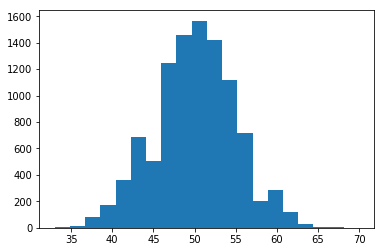

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(8)
x = np.random.binomial(100, 0.5, size=10000)
plt.hist(x,bins=20) # or plt.hist(x,20)
plt.show()


# Bar plot

Bar plots are useful for comparing absolute levels of discrete data series. They are created by the function plt.bar(labels,heights) in Matplotlib.

Let's look at the example of the market capitalization of today's much hyped cryptocurrencies. The five top cryptocurrencies in terms of market capitalization are shown here:



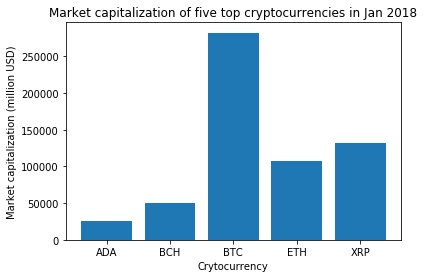

In [2]:
import matplotlib.pyplot as plt

# Data retrieved from https://coinmarketcap.com on Jan 8, 2018
# Prepare the data series
cc = ['BTC','XRP','ETH','BCH','ADA']
cap = [282034,131378,107393,49999,26137]

# Plot the bar chart
plt.bar(cc,cap)
plt.title('Market capitalization of five top cryptocurrencies in Jan 2018')
plt.xlabel('Crytocurrency')
plt.ylabel('Market capitalization (million USD)')
plt.show()

To create bar plots with bars in the designated order, we can make use of Pandas and its Matplotlib integration. The procedure is as follows:

    Create a Pandas DataFrame df
    Plot the bar chart with df.plot(kind='bar')
    Set the labels of xticks
    Adjust the other plot properties
    Show the plot with plt.show()

Please note that, by default, df.plot() includes a legend. We need to specify legend=False to turn it off.

Here is an example to reorder the bar plot in the previous output figure:

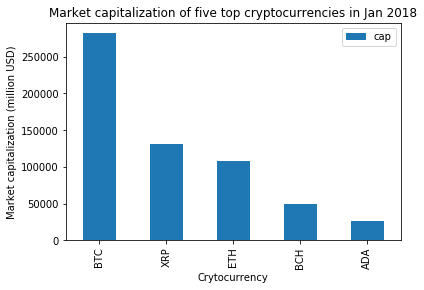

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'cc':cc,'cap':cap})

ax = df.plot(kind='bar')
ax.set_xticklabels(df['cc'])

plt.title('Market capitalization of five top cryptocurrencies in Jan 2018')
plt.xlabel('Crytocurrency')
plt.ylabel('Market capitalization (million USD)')
plt.show()


# Setting bar plot properties

We can set the width, color, and bottom coordinates of the bars as keyword arguments in plt.bar().

The bar width is set in ratios, whereas the color is set as introduced in the earlier section of this chapter.
For data that may include experimental or measurement errors, we can input lists of yerr (and xerr) values to show the accuracy.

# Drawing bar plots with error bars using multivariate data

We can easily create bar plots with multiple data series with Pandas df.plot(). This API also allows us to easily add error bars by supplying the xerr and yerr parameters. Let's have a look at an example that demonstrates the usage of this function along with bar property adjustment. 
The following code snippet draws a multibar plot to show the performance of an imaginary drug to treat inflammation, by comparing the level of an inflammatory protein before and after treatment of a drug and placebo as control:

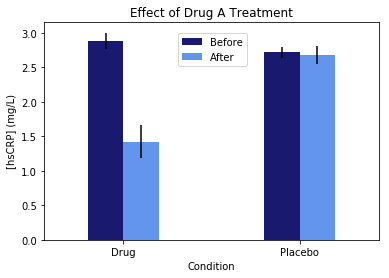

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data series
labels_drug = ['Drug (Before)', 'Drug (After)']
labels_placebo = ['Placebo (Before)', 'Drug (After)']
drug = [2.88,1.42]
placebo = [2.72,2.68]
yerr_drug = [0.12,0.08]
yerr_placebo = [0.24,0.13]

df = pd.DataFrame([drug,placebo])
df.columns = ['Before', 'After']
df.index = ['Drug','Placebo']

# Plot the bar chart with error bars
df.plot(kind='bar',width=0.4,color=['midnightblue','cornflowerblue'],\
        yerr=[yerr_drug,yerr_placebo])

plt.title('Effect of Drug A Treatment')
plt.xlabel('Condition')
plt.ylabel('[hsCRP] (mg/L)')
plt.xticks(rotation=0) # to keep the xtick labels horizontal
plt.legend(loc=(0.4,0.8))

plt.show()


# Mean-and-error plots

For experimental sciences, a data point is often averaged from several repeats of experiments, necessitating the need to show the error range to illustrate the precision level. In this case, mean-and-error plots may be more suitable than bar charts. In Matplotlib, mean-and-error plots are generated by the plt.errorbar()API.
<br>
When the positive errors and negative errors are the same, we can input 1D arrays to error values to draw symmetric error bars. Otherwise, we input 2D arrays of [positive errors, negative errors] for asymmetric error bars. While it is more common to have plots with y errors only, error values for both x and y axes are supported.
<br>
By default, Matplotlib draws a line linking each error bar, with format fmt set to '.-'. For discrete datasets, we can add the keyword argument fmt='.' to remove the line. Let's go through a simple example:

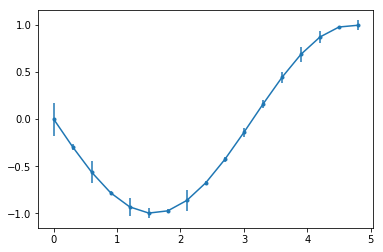

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for a sine curve
x = np.arange(0, 5, 0.3)
y = np.sin(-x)

# Prepare random error to plot the error bar
np.random.seed(100)
e1 = 0.1 * np.abs(np.random.randn(len(y)))

# Plotting the error bar
plt.errorbar(x, y, yerr=e1, fmt='.-')
plt.show()


#Pie chart

Pie chart is a circular representation of component ratios. The angle, and hence the arc length of each sector ratio (also called wedges), presents the proportion that each component accounts for, relative to the whole.
<br> 
Matplotlib provides the plt.pie() function to draw pie charts. We can label each sector with labels as well as the percentage with autopct automatically. For different ways to customize the string format of the percentages, you may refer to: https://pyformat.info/.<br> 
To maintain the circular shape of our pie chart, we specify the same width and length for a square figure with plt.figure(figsize=(n,n)).<br> 
Here, we have an example of web server usage in the first week of January 2017:

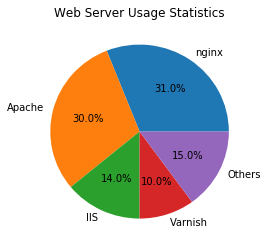

In [9]:
# Data obtained from https://trends.builtwith.com/web-server on Jan 06, 2017
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))

x = [0.31,0.3,0.14,0.1,0.15]
labels = ['nginx','Apache','IIS','Varnish','Others']
plt.pie(x,labels=labels,autopct='%1.1f%%')
plt.title('Web Server Usage Statistics')
plt.show()

We can also separate each sector by passing a list of ratios to the keyword argument explode. For example, adding the argument explode=[0.1]*5 to the preceding plt.pie() plot will generate the following result:

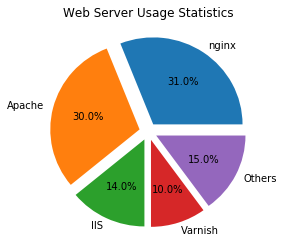

In [22]:
# Data obtained from https://trends.builtwith.com/web-server on Jan 06, 2017
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))

x = [0.31,0.3,0.14,0.1,0.15]
labels = ['nginx','Apache','IIS','Varnish','Others']
plt.pie(x,labels=labels,autopct='%1.1f%%', explode=[0.1]*5)
# explode=[0.1]*5
plt.title('Web Server Usage Statistics')
plt.show()

Please note that if the input array sums up to less than 1, the output pie chart will be incomplete, as shown in the following example:

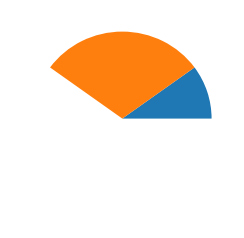

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
x = [0.1,0.3]
plt.pie(x)
plt.show()

In that case, we have to explicitly specify the ratio of each term. For instance, in the preceding example, change x = [0.1,0.3] to x = [0.25,0.75].


# Polar chart

A polar chart is used to display multivariate data and is also known as a radar chart or a spider chart. It is often seen in illustrations of strength in different aspects of different objects for comparison, such as the evaluation of the price and various specifications of a piece of hardware, or the abilities of a game character.
<br>
Moreover, polar plots are also useful in drawing mathematical functions, which we are going to demonstrate here. In Matplotlib, we draw polar charts with the command plt.polar(). Apart from the x, y coordinate system we are familiar with, polar coordinates are used for polar charts, angles, and radii. The central point is called the pole. Note that Matplotlib takes a degree unit for the angle input.
 Here is the code to draw a polar rose:

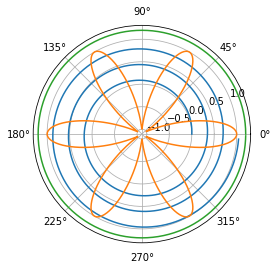

In [23]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.arange(0., 2., 1./180.)*np.pi
plt.polar(3*theta, theta/6)
plt.polar(theta, np.cos(6*theta))
plt.polar(theta, [1.2]*len(theta))

plt.savefig('mpldev_03_polarrose.png')
plt.show()


# Controlling radial and angular grids

There are two functions to control the radial and angular grids: rgrid() and thetagrid() respectively. We can pass the radii, labels, and angle arguments to the rgrid() function, and angles, labels, and frac to the thetagrid() function, respectively.

# Text and annotations

To enhance the understanding of plot details, we may sometimes add in text annotations for explanation. We will now introduce the methods of adding and adjusting text in Matplotlib plots.

# Adding text annotations

We can add text to our plot by calling plt.text(x,y,text); we specify the x and y coordinates and the text string.
Here is a quick example:

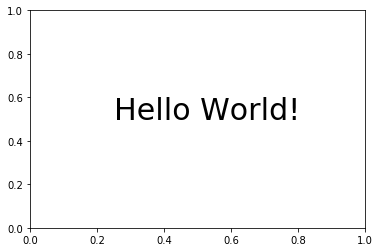

In [24]:
plt.text(0.25,0.5,'Hello World!',fontsize=30)
plt.show()


# Font

Here are some of the common font properties adjustable in Matplotlib:

    Font size: Float or relative size, for example, smaller and x-large
    Font weight: For example, bold or semibold
    Font style: For example, italic
    Font family: For example, Arial
    Rotation: Angle in degrees; it is vertical or horizontal

# Mathtext

To create a mathtext notation, we precede a string with r, such as r'$\alpha'. The following is a short code for demo:

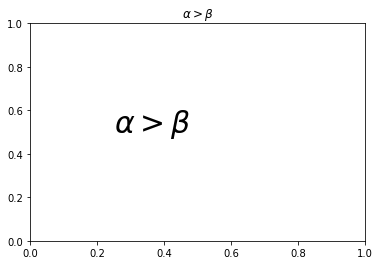

In [28]:
plt.title(r'$\alpha > \beta$')
plt.text(0.25,0.5,r'$\alpha > \beta$',fontsize=30)
plt.show()


# Arrows

To point out specific features in a plot, we can draw arrows with the function plt.arrow(). This code illustrates the different available styles of arrow annotations:

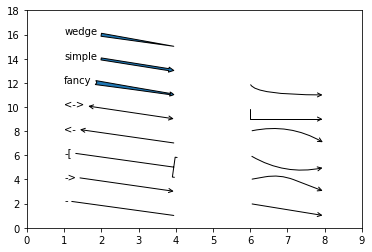

In [29]:
import matplotlib.pyplot as plt

plt.axis([0, 9, 0, 18])
arrstyles = ['-', '->', '-[', '<-', '<->', 'fancy', 'simple', 'wedge']
for i, style in enumerate(arrstyles):
 plt.annotate(style, xytext=(1, 2+2*i), xy=(4, 1+2*i), \
 arrowprops=dict(arrowstyle=style))
connstyles=["arc", "arc,angleA=10,armA=30,rad=15", \
 "arc3,rad=.2", "arc3,rad=-.2", "angle", "angle3"]

for i, style in enumerate(connstyles):
 plt.annotate("", xytext=(6, 2+2*i), xy=(8, 1+2*i), \
 arrowprops=dict(arrowstyle='->', connectionstyle=style))

plt.show()


# Using style sheets

We have learned to style our plots step by step so far. For more persistent and portable settings, we can apply a predefined global style via the matplotlib.style module:
# Available styles
 Matplotlib provides a number of pre-built style sheets. You can check them out by with `matplotlib.style.available`.

In [30]:
import matplotlib as mpl
mpl.style.available

['seaborn',
 'seaborn-muted',
 'seaborn-bright',
 'seaborn-colorblind',
 'fast',
 'ggplot',
 'seaborn-dark-palette',
 'seaborn-ticks',
 'seaborn-deep',
 'seaborn-pastel',
 'seaborn-talk',
 '_classic_test',
 'classic',
 'grayscale',
 'bmh',
 'seaborn-darkgrid',
 'dark_background',
 'fivethirtyeight',
 'seaborn-notebook',
 'seaborn-whitegrid',
 'seaborn-dark',
 'seaborn-white',
 'Solarize_Light2',
 'seaborn-poster',
 'seaborn-paper']


# Applying a style sheet

We can call plt.style.use(stylename) to apply a style. This function takes in built-in style sheets, local paths, and URLs.

# Resetting to default styles

The effects set by style sheets are sustained through new plots. To reset to the default parameters, call plt.rcdefaults().
